In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# 23August2017
most_recent_date = (
    session
    .query(func.max(Measurement.date)).scalar()
)
most_recent_date

'2017-08-23'

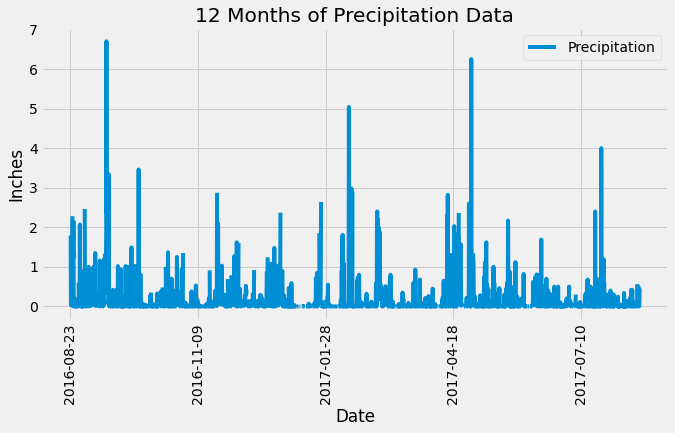

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_twelve = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=366)
last_twelve

# prcp_data = session.query(Measurement.date).filter(Measurement.date >= last_twelve).filter(Measurement.date <= most_recent_date)
# prcp_data


# Perform a query to retrieve the data and precipitation scores
last12months = (
    session
    .query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= last_twelve).all()
)

last12months

# Save the query results as a Pandas DataFrame and set the index to the date column
ResultsDF = pd.DataFrame(last12months, columns=['Dates', 'Precipitation']) 
ResultsDF.set_index('Dates', inplace=True)


# Sort the dataframe by date

ResultsDFS = ResultsDF.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
ResultsDFS.plot(y='Precipitation', rot = 90, alpha=1, figsize=(10,5))
plt.title("12 Months of Precipitation Data")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
SummaryStats = ResultsDF.describe()
SummaryStats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stations = (
    session
    .query(Station.station)
    .count()
)

stations


9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
moststations = (
    session
    .query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()

)

moststations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activest = (
    session
    .query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))
    .filter(Measurement.station == 'USC00519281')
    .all()
        
)

activest

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

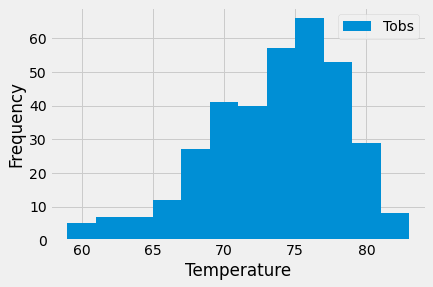

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data and precipitation scores
last12monthstobs = (
    session
    .query(Measurement.tobs)
    .filter(Measurement.date >= last_twelve)
    .filter(Measurement.station == 'USC00519281')
    .all()
)

last12monthstobs


df = pd.DataFrame (last12monthstobs, columns = ['Tobs'])

df.plot.hist(by=None, bins=12)
plt.xlabel("Temperature")


# Close session

In [16]:
# Close Session
session.close()